#### Réalisé par :

- KENAI Imad Eddine 191932017671 G3
- BENKOUITEN Aymen 191931046409 G3

# TP 3 Regression logistique
Dans ce TP, nous aimerions prédire l'admission d'un étudiant à une specialité donnée selon ses notes dans deux matières.

Pour ce faire, nous étudierons un ensemble de données avec l'admission  (y) et les notes des deux modules (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(100, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente l'admission à la specialité (1 admis 0 non admis).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2:]

In [4]:
print('X ', X.shape ,' y ', y.shape)

X  (100, 3)  y  (100, 1)


# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [5]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1 / (1 + np.exp(-z))
 

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [6]:
def computeCost(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte

    # calculer le coût avec et sans vectorisation, 
    # comparer le temps de traitement
    eps = 1e-15
    y_hat = np.clip(Sigmoid(np.dot(X , theta)), eps, 1 - eps)
    return -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)).mean(axis=0)


2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [8]:
def gradientDescent(X, y, theta, alpha, iterations, early_stopping=False):
    # garder aussi le cout à chaque itération 
    # pour afficher le coût en fonction de theta0 et theta1
    epsilon = 1e-9
    costs = []
    gradients = []
    for i in range(iterations):
        y_hat = Sigmoid(np.dot(X , theta))
        
        error = y_hat - y
        
        cost = computeCost(X, y, theta)
        costs.append(cost)
        
        theta_grad = np.expand_dims((X * error).mean(axis=0), axis=1)#expand the shape of the array
        
        gradients.append(theta_grad)
        
        theta = theta - alpha * theta_grad
        
        if early_stopping and np.absolute(theta_grad.mean()) < epsilon:
            break;
    
    return theta, np.asarray(costs), np.asarray(gradients)

In [12]:
def plot_cost_gradient(costs, gradients):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 2)
    plt.title("costs")
    plt.plot(range(costs.shape[0]), costs)
    plt.xlabel('iterations')
    plt.ylabel('cost')
    plt.subplot(1, 2, 1)
    plt.title("gradients")
    for i in range(gradients.shape[1]):
        plt.plot(range(gradients.shape[0]), gradients[:, i])
    plt.xlabel('iterations')
    plt.ylabel('gardient')

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

Calculer le cout initial

Appel des la fonction de calcul du gradient

In [13]:
n=X.shape[1]
theta = np.zeros((n, 1))
initialCost=computeCost(X, y, theta)
# paramètres
iterations = 5000;
alpha = 0.02;
# Appel
theta, costs, gradients = gradientDescent(X, y, theta, alpha, iterations);
theta, costs.shape, gradients.shape

(array([[-4.80200887],
        [ 0.22602013],
        [ 0.19054414]]),
 (5000, 1),
 (5000, 3, 1))

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

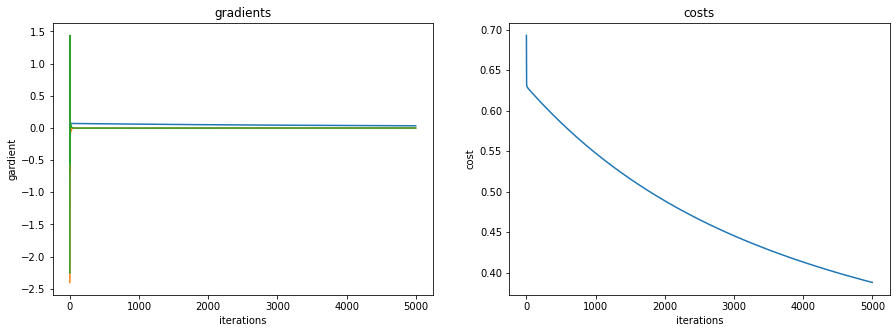

In [14]:
plot_cost_gradient(costs, gradients)

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [23]:
def drawLine(X, y, theta, title=""):
    plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepted",marker ='o',color='green')
    plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="not accepted",marker ='x',color='red')
   
    x1_min, x1_max = X[:, 1].min(), X[:, 1].max()
    x2_min, x2_max = (-(theta[1] * x1_min + theta[0]) / theta[2])[0], (-(theta[1] * x1_max + theta[0]) / theta[2])[0]

    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    plt.legend()
    plt.plot([x1_min, x1_max], [x2_min, x2_max])
 

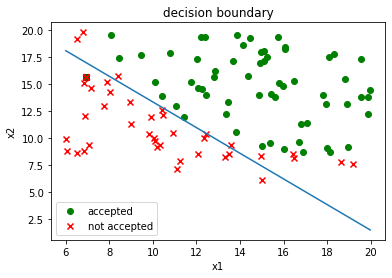

In [24]:
drawLine(X, y, theta, title="decision boundary")

# Affichage 
Graphe representant les acceptations selon les caracteristiques

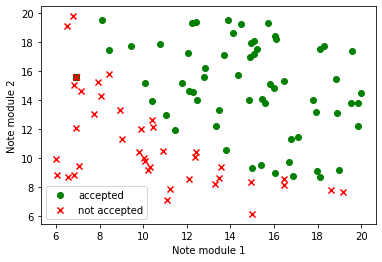

In [26]:
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepted",marker ='o',color='green')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2],label="not accepted",marker ='x',color='red')

plt.xlabel('Note module 1')
plt.ylabel('Note module 2')
plt.legend()

Traçage du coût en fonction de theta0 et theta1

In [28]:
%matplotlib notebook

<IPython.core.display.Javascript object>


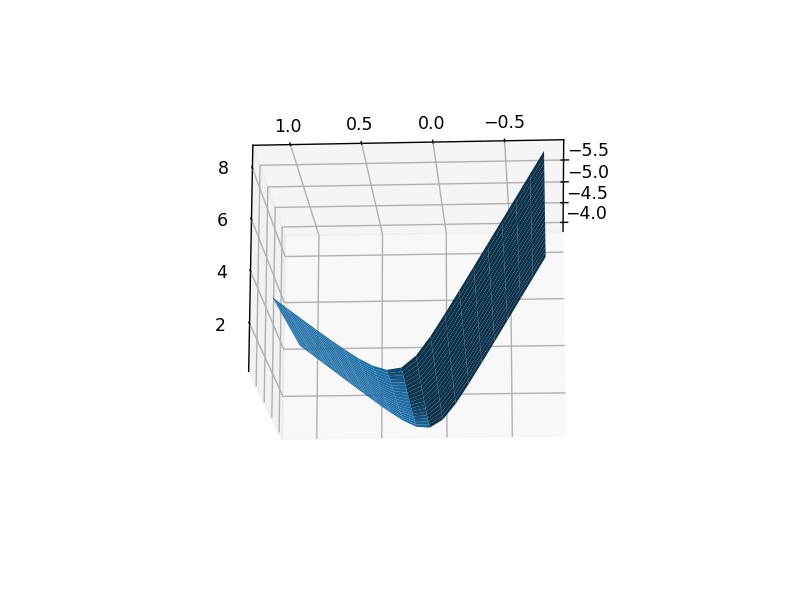

In [29]:
theta_0_range, theta_1_range = np.meshgrid(np.arange(theta[0] - 1, theta[0] + 1, 0.1), 
                                           np.arange(theta[1] - 1, theta[1] + 1, 0.1))
theta_mesh = np.expand_dims(np.stack((theta_0_range, theta_1_range), axis=-1), axis=3)
loss = np.asarray(
    [
        [computeCost(X, y, np.concatenate((theta_mesh[i, j], np.expand_dims(theta[2], axis=1)), axis=0))[0]
             for j in range(theta_mesh.shape[1])
        ] 
        for i in range(theta_mesh.shape[0])
    ]
)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta_0_range, theta_1_range, loss)

Prédire des valeurs de y

In [30]:
# Predire pour des notes note1= 9 et note2=17
x = np.array([[1, 9, 17]])
np.dot(x , theta)

array([[0.47142274]])

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [42]:
def comparer(X, y, theta):
    sklearn_model = LogisticRegression(penalty='none', max_iter=1500)
    sklearn_model.fit(X[:, 1:], np.squeeze(y, axis=1))
    
    theta_sk = np.zeros(theta.shape)
    theta_sk[1:] = sklearn_model.coef_.reshape(-1, 1)
    theta_sk[0] = sklearn_model.intercept_[0]
    theta_sk = np.reshape(theta_sk, (-1, 1))
    
    print("sklearn model params :", theta_sk)
    print("our model params     :", theta)
    
    print("\nnumber of iterations of the sklearn algorithm : ", sklearn_model.n_iter_[0])
    print("\n=== using our loss")
    print("our model error     : ", computeCost(X, y, theta)[0])
    print("sklearn model error : ", computeCost(X, y, theta_sk)[0])
    
    print("\n=== using sklearn loss")
    print("our model error     : ", log_loss(y, Sigmoid(X @ theta)))
    print("sklearn model error : ", log_loss(y, Sigmoid(X @ theta_sk)))
    
    plt.figure(figsize=(25, 10))
    plt.subplot(1, 2, 1)
    drawLine(X, y, theta_sk, "sklearn model")
    plt.subplot(1, 2, 2)
    drawLine(X, y, theta, "our model")

sklearn model params : [[-25.16191033]
 [  1.03118901]
 [  1.00736753]]
our model params     : [[-4.80200887]
 [ 0.22602013]
 [ 0.19054414]]

number of iterations of the sklearn algorithm :  19

=== using our loss
our model error     :  0.3877164856208028
sklearn model error :  0.20349451147972483

=== using sklearn loss
our model error     :  0.3877164856208028
sklearn model error :  0.20349451147972483


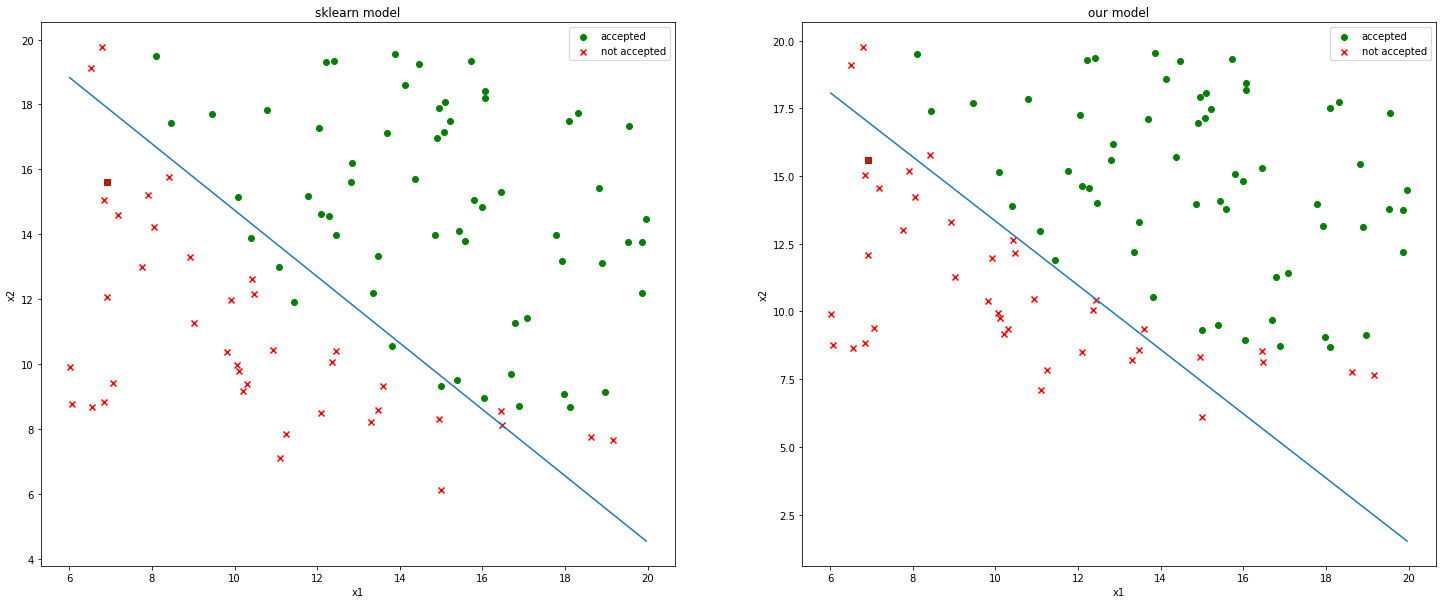

In [43]:
%matplotlib inline
comparer(X, y, theta)

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

#### Standardisation des données

In [37]:
X_mean, X_std = X[:, 1:].mean(axis=0), X[:, 1:].std(axis=0)
X_standardized = np.ones_like(X)
X_standardized[:, 1:] = (X[:, 1:] - X_mean) / X_std

In [38]:
n=X_standardized.shape[1]
theta_standardized = np.zeros((n, 1))

# paramètres
iterations_standardized = 1500;
alpha_standardized = 0.01;
# Appel
theta_standardized, costs_standardized, gradients_standardized = gradientDescent(
    X_standardized, 
    y,
    theta,
    alpha_standardized,
    iterations_standardized
);
theta_standardized, costs_standardized.shape, gradients_standardized.shape

(array([[-0.02630102],
        [ 1.90081061],
        [ 1.65872747]]),
 (1500, 1),
 (1500, 3, 1))

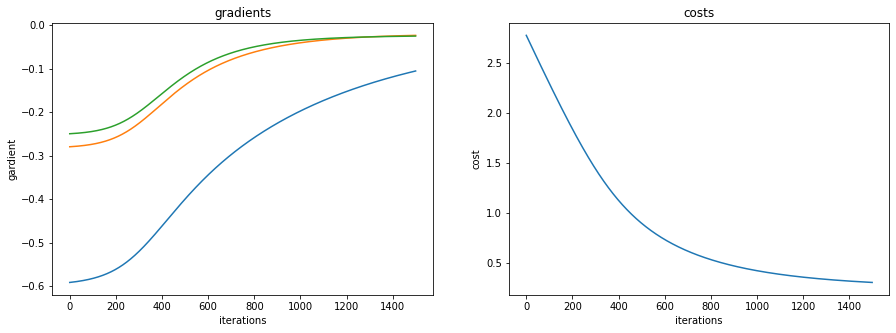

In [39]:
plot_cost_gradient(costs_standardized, gradients_standardized)

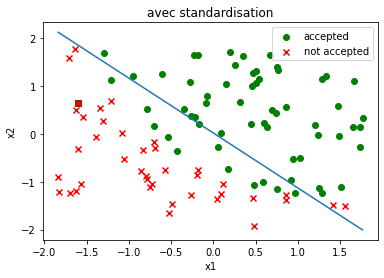

In [40]:
drawLine(X_standardized, y, theta_standardized, title="avec standardisation")

**La convergence est bien plus rapide et avec moins d'itérations**<br>
(lr=0.02, iter=3000 pour le premier et lr=0.01, iter=1500 pour le dataset standardisé)

sklearn model params : [[1.7184621 ]
 [3.99290321]
 [3.72518393]]
our model params     : [[-0.02630102]
 [ 1.90081061]
 [ 1.65872747]]

number of iterations of the sklearn algorithm :  12

=== using our loss
our model error     :  0.29997220532623103
sklearn model error :  0.20349451148113218

=== using sklearn loss
our model error     :  0.29997220532623103
sklearn model error :  0.20349451148113218


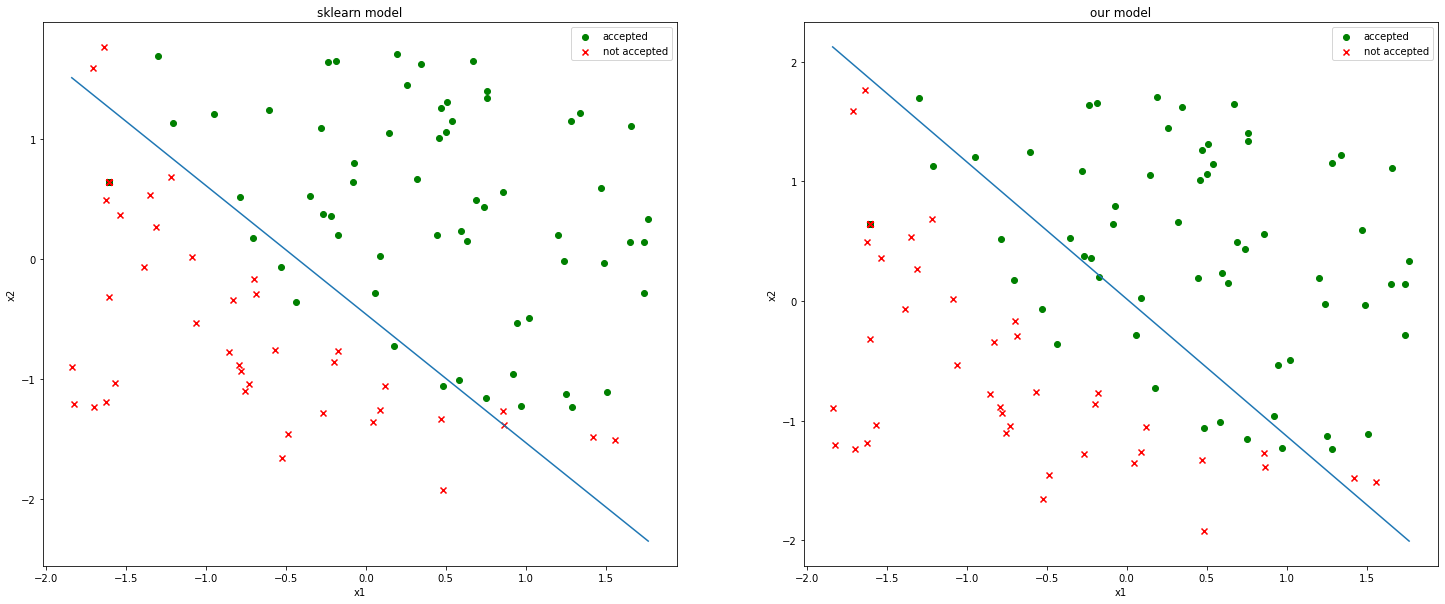

In [44]:
comparer(X_standardized, y, theta_standardized)

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 25 Mars 2022 à 22h


In [23]:
# bonne chance